In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


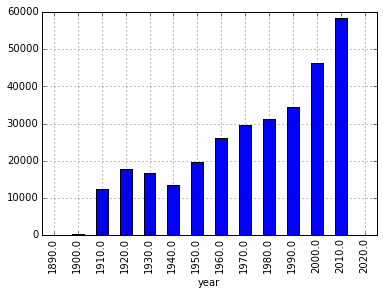

In [5]:
# Using groupby(), plot the number of films
# that have been released each decade in the history of cinema.

t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

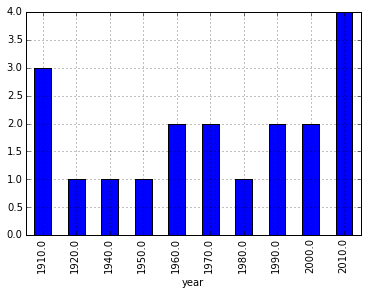

In [6]:
# Use groupby() to plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

In [7]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in each year of the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      744
      actress    351
1951  actor      766
      actress    365
1952  actor      751
      actress    359
1953  actor      785
      actress    377
1954  actor      767
      actress    398
1955  actor      764
      actress    345
1956  actor      799
      actress    401
1957  actor      920
      actress    394
1958  actor      872
      actress    392
1959  actor      881
      actress    383
dtype: int64

In [8]:
# In the 1950s decade taken as a whole,
# how many total roles were available to actors,
# and how many to actresses, for each "n" number 1 through 5?

c = cast
c = c[c.year // 10 * 10 == 1950]
c = c[c.n < 6]
c.groupby(['n', 'type']).size()

n  type   
1  actor      8049
   actress    3765
2  actor      5632
   actress    5543
3  actor      6746
   actress    3920
4  actor      6695
   actress    3568
5  actor      6661
   actress    3199
dtype: int64

In [46]:
# Use groupby() to determine how many roles are listed
# for each of the Pink Panther movies.

c = cast
c = c[c.title == 'The Pink Panther']
c = c.sort('n').groupby(['year'])[['n']].max()
c

,n
year,
1963,15
2006,50


In [32]:
# List, in order by year, each of the films
# in which Frank Oz has played more than 1 role.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                                   
1979  The Muppet Movie                            7
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64

In [36]:
# List each of the characters that Frank Oz
# has portrayed at least twice.

c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64